<a href="https://colab.research.google.com/github/elif-cetiin/real-estate-data-analysis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)


In [1]:
from google.colab import files
uploaded = files.upload()


Saving RealEstate.csv to RealEstate.csv


In [4]:
df = pd.read_csv("RealEstate.csv")
df.head()


,MLS,Location,Price,Bedrooms,Bathrooms,Size,Status
0,132842,Arroyo Grande,795000,3,3,2371,Short Sale
1,134364,Paso Robles,399000,4,3,2818,Short Sale
2,135141,Paso Robles,545000,4,3,3032,Short Sale
3,135712,Morro Bay,909000,4,4,3540,Short Sale
4,136282,Santa Maria-Orcutt,109900,3,1,1249,Short Sale


In [5]:
df.shape


(781, 7)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MLS        781 non-null    int64 
 1   Location   781 non-null    object
 2   Price      781 non-null    int64 
 3   Bedrooms   781 non-null    int64 
 4   Bathrooms  781 non-null    int64 
 5   Size       781 non-null    int64 
 6   Status     781 non-null    object
dtypes: int64(5), object(2)
memory usage: 42.8+ KB


In [7]:
df.describe()


,MLS,Price,Bedrooms,Bathrooms,Size
count,781.000000,7.810000e+02,781.000000,781.000000,781.000000
mean,151224.550576,3.833291e+05,3.142125,2.355954,1755.058899
std,3936.122042,3.490381e+05,0.855768,0.846596,819.577603
min,132842.000000,2.650000e+04,0.000000,1.000000,120.000000
25%,149922.000000,1.990000e+05,3.000000,2.000000,1218.000000
50%,152581.000000,2.950000e+05,3.000000,2.000000,1550.000000
75%,154167.000000,4.290000e+05,4.000000,3.000000,2032.000000
max,154580.000000,5.499000e+06,10.000000,11.000000,6800.000000


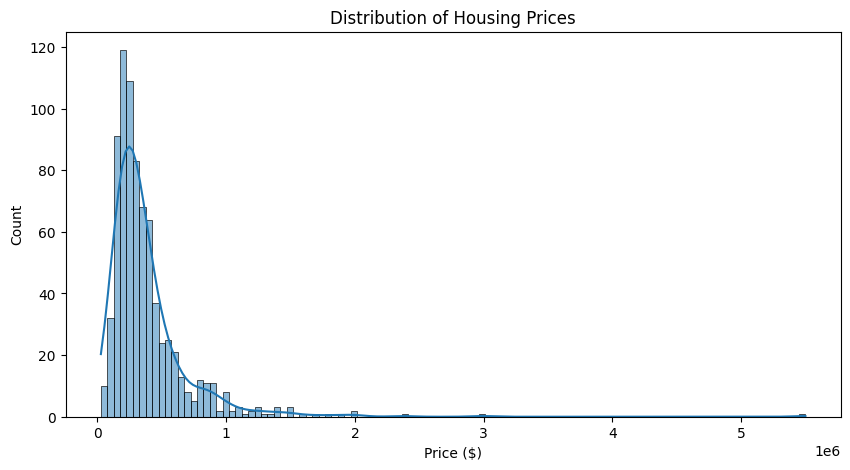

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df["Price"], kde=True)
plt.title("Distribution of Housing Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()


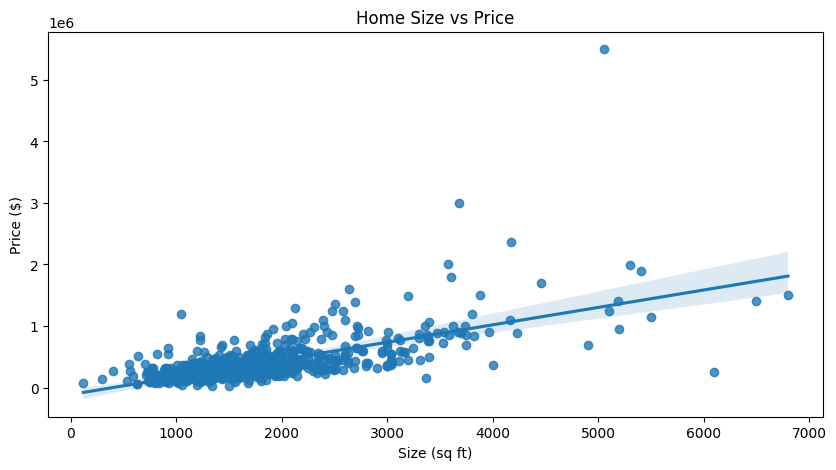

In [9]:
plt.figure(figsize=(10,5))
sns.regplot(x="Size", y="Price", data=df)
plt.title("Home Size vs Price")
plt.xlabel("Size (sq ft)")
plt.ylabel("Price ($)")
plt.show()


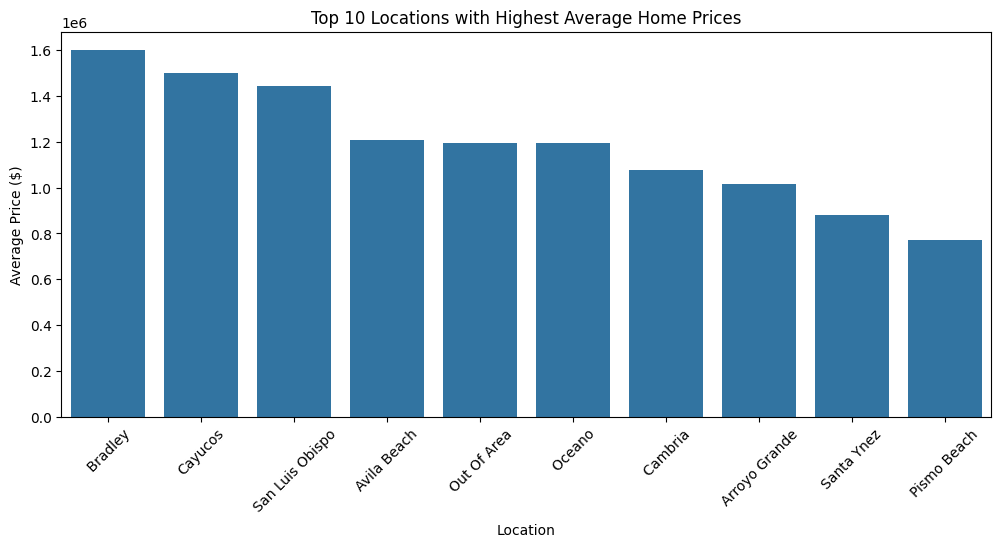

In [10]:
plt.figure(figsize=(12,5))
avg_price = df.groupby("Location")["Price"].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_price.index, y=avg_price.values)
plt.title("Top 10 Locations with Highest Average Home Prices")
plt.xlabel("Location")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.show()


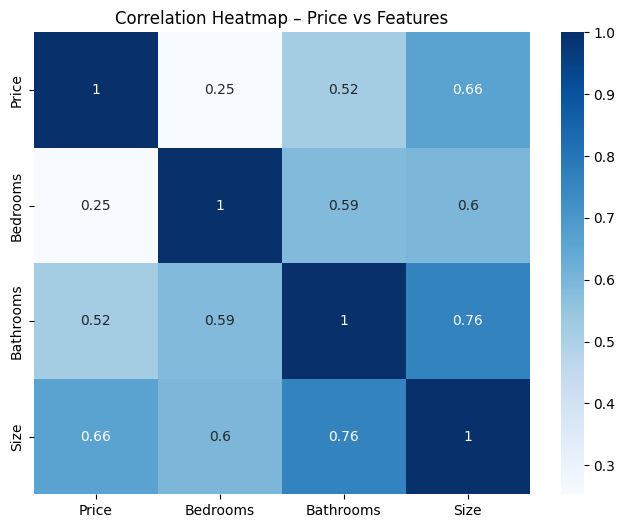

In [11]:
plt.figure(figsize=(8,6))
corr = df[["Price", "Bedrooms", "Bathrooms", "Size"]].corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap – Price vs Features")
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[["Size"]]
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Model coefficient (Slope):", model.coef_[0])
print("Model intercept:", model.intercept_)
print("R² Score:", model.score(X_test, y_test))


Model coefficient (Slope): 288.0021374093372
Model intercept: -122830.06223391904
R² Score: 0.5458890300251953


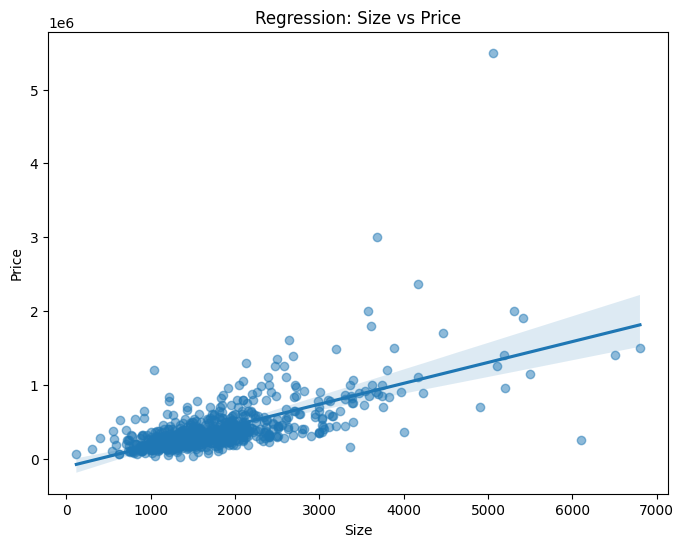

In [13]:
plt.figure(figsize=(8,6))
sns.regplot(x="Size", y="Price", data=df, scatter_kws={"alpha":0.5})
plt.title("Regression: Size vs Price")
plt.show()


In [14]:
# Check duplicate rows
print("Duplicate rows before:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

print("Duplicate rows after:", df.duplicated().sum())


Duplicate rows before: 0
Duplicate rows after: 0


In [15]:
# Outlier removal using IQR
Q1 = df[["Price", "Size"]].quantile(0.25)
Q3 = df[["Price", "Size"]].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[["Price", "Size"]] < (Q1 - 1.5 * IQR)) | (df[["Price", "Size"]] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Dataset size after outlier removal:", df.shape)


Dataset size after outlier removal: (700, 7)
